In [306]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [177]:
df.shape

(32560, 15)

In [178]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [179]:
df.isnull().sum().sum()

0

In [ ]:
#data has no null values ,now let's check data types

In [180]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [ ]:
#we will do encoding further to change the categorical features and label through various encoding techniques

In [181]:
#now we will check the correlation of features with one another
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


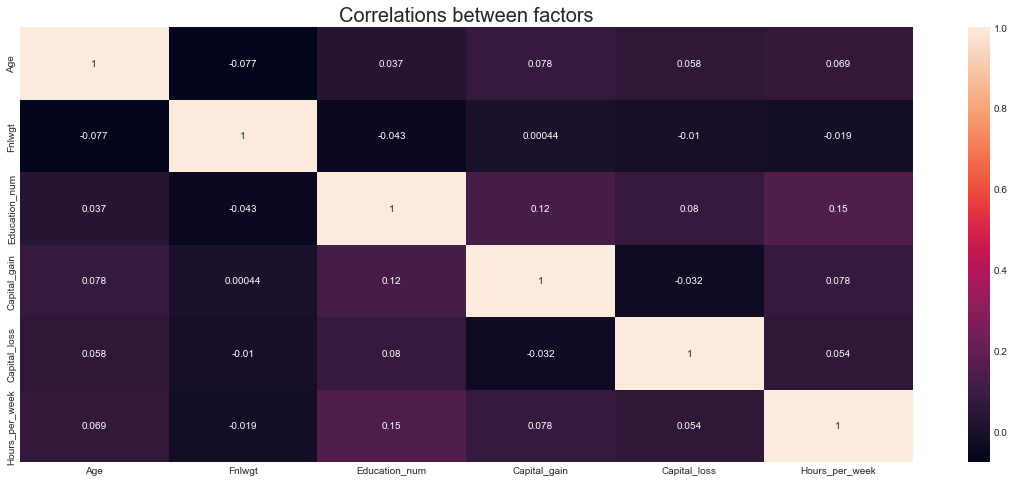

In [182]:
#we will be claryfying this by plotting heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [183]:
# EXPLORATORY DATA ANALYSIS

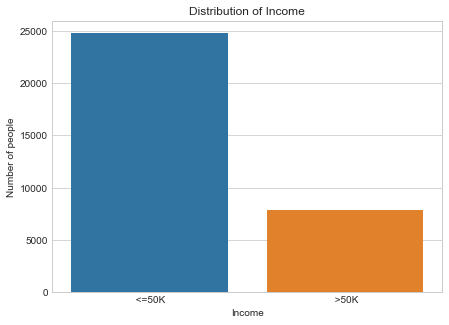

In [184]:
#by count plot we will analyse the distribution of income of people
plt.figure(figsize=(7, 5))
sns.countplot(df['Income'])
df['Income'].value_counts()
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.show()

In [ ]:
#their is imbalance in the dataset so we will deal it with later

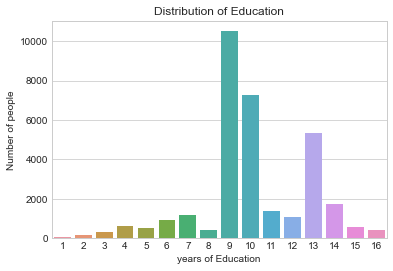

In [187]:
#by this countplot we will analyse the distribution of education among number of people
sns.countplot(df['Education_num'])
plt.title('Distribution of Education')
plt.xlabel('years of Education')
plt.ylabel('Number of people')
plt.show()

In [ ]:
#their is around 10000 people who have studied 9yrs and around 7000 people who studied for 10 yrs

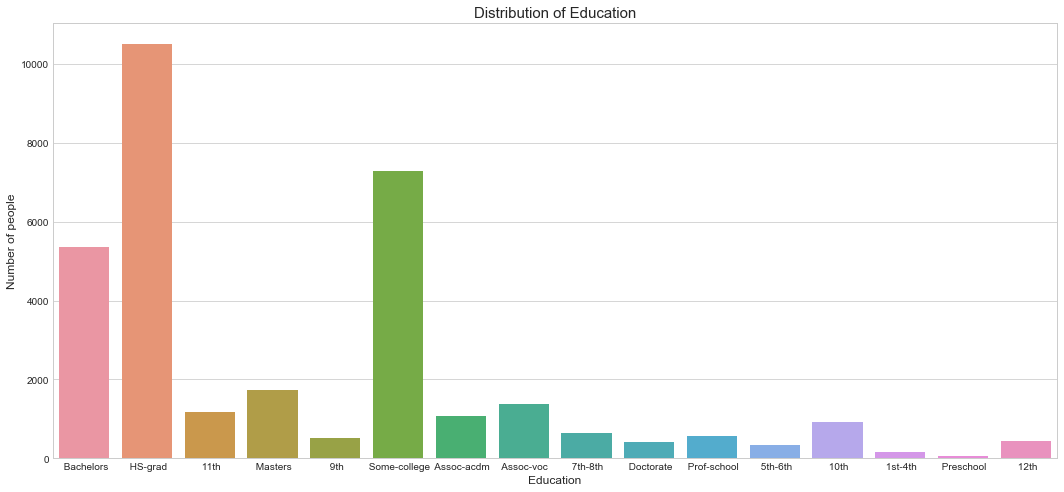

In [188]:
plt.figure(figsize=(18, 8))
sns.countplot(df['Education'])
plt.title('Distribution of Education',fontsize=15)
plt.xlabel('Education',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.show()

In [ ]:
#around 10000 people have done high school-graduation and around 7000 have done some college

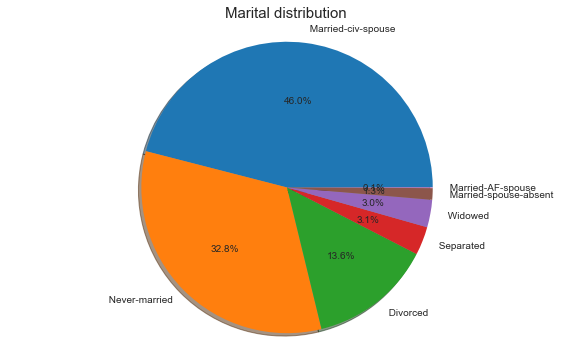

In [190]:
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(marital.values, labels=marital.index,autopct='%1.1f%%',shadow=True)
plt.title('Marital distribution',fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#majority of people are married with civilian spouse with percentage of 40 and around 32% people never married,rest have minority

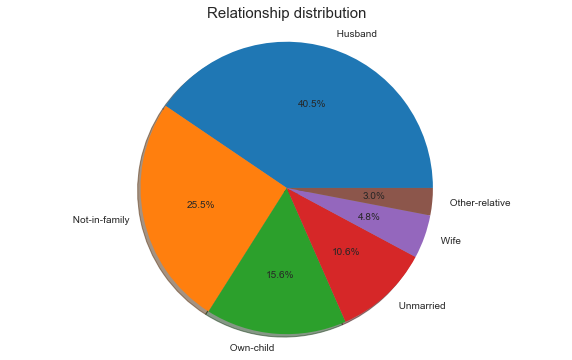

In [191]:
relations = df['Relationship'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(relations.values, labels=relations.index,autopct='%1.1f%%',shadow=True)
plt.title('Relationship distribution',fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#around 40% people have relation with husband and 25% are not in family,rest are in minority

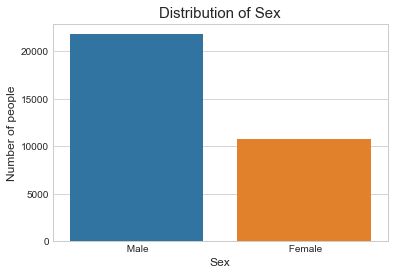

In [192]:

sns.countplot(df['Sex'])
plt.title('Distribution of Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.show()

In [ ]:
#around 25000 male are there....and female are nearly half the no of males

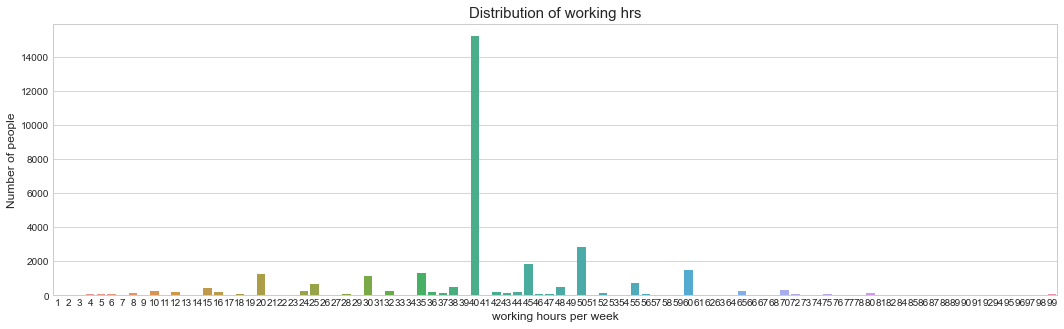

In [193]:
plt.figure(figsize=(18, 5))
sns.countplot(df['Hours_per_week'])
plt.title('Distribution of working hrs',fontsize=15)
plt.xlabel('working hours per week',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.show()

In [ ]:
#most of the people work 40 hours per week

<AxesSubplot:xlabel='Age', ylabel='Density'>

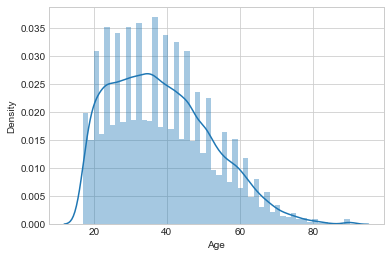

In [194]:
sns.distplot(df['Age'])

In [ ]:
#major earning group belong to age 20-45

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

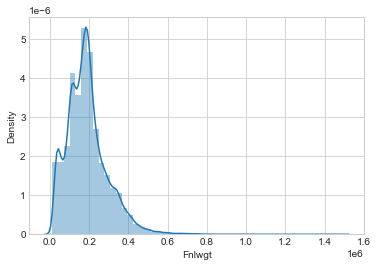

In [195]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

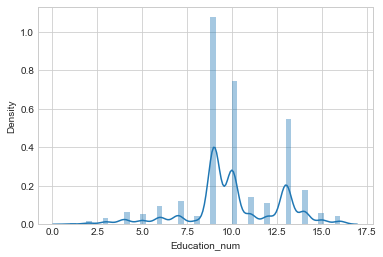

In [196]:
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

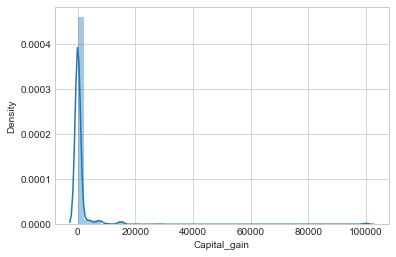

In [197]:
sns.distplot(df['Capital_gain'])  

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

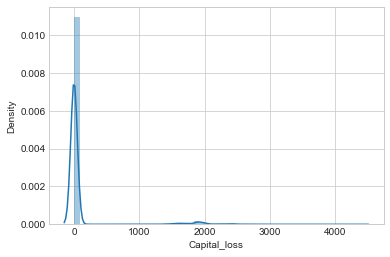

In [198]:
sns.distplot(df['Capital_loss']) 

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

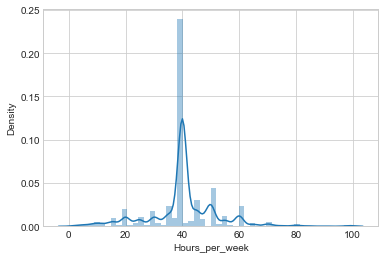

In [199]:
sns.distplot(df['Hours_per_week'])

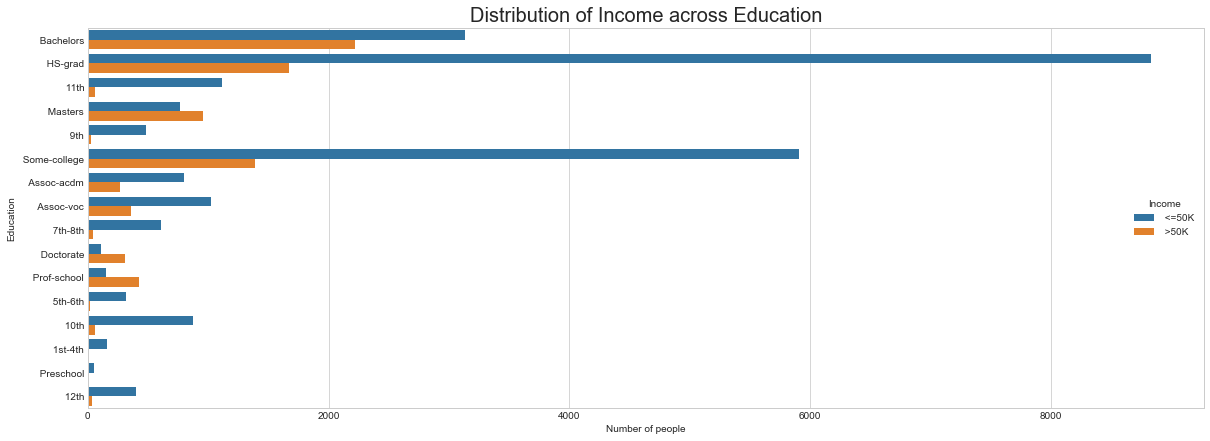

In [200]:
plt.figure(figsize=(20, 7))
sns.countplot( y='Education',hue='Income',data=df)
plt.title('Distribution of Income across Education',fontsize=20)
plt.xlabel('Number of people',fontsize=10)
plt.ylabel('Education',fontsize=10)
plt.show()

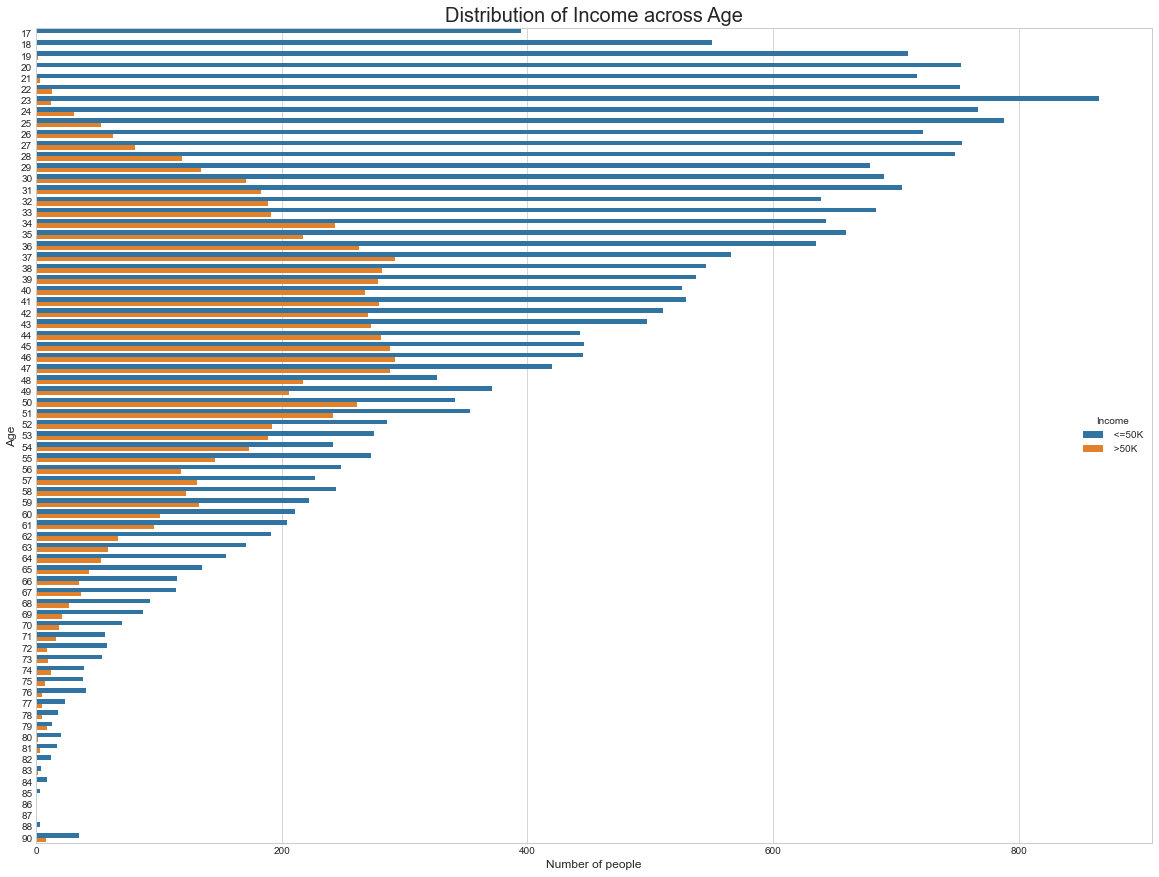

In [201]:
plt.figure(figsize=(20, 15))
sns.countplot( y='Age',hue='Income',data=df)
plt.title('Distribution of Income across Age',fontsize=20)
plt.xlabel('Number of people',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

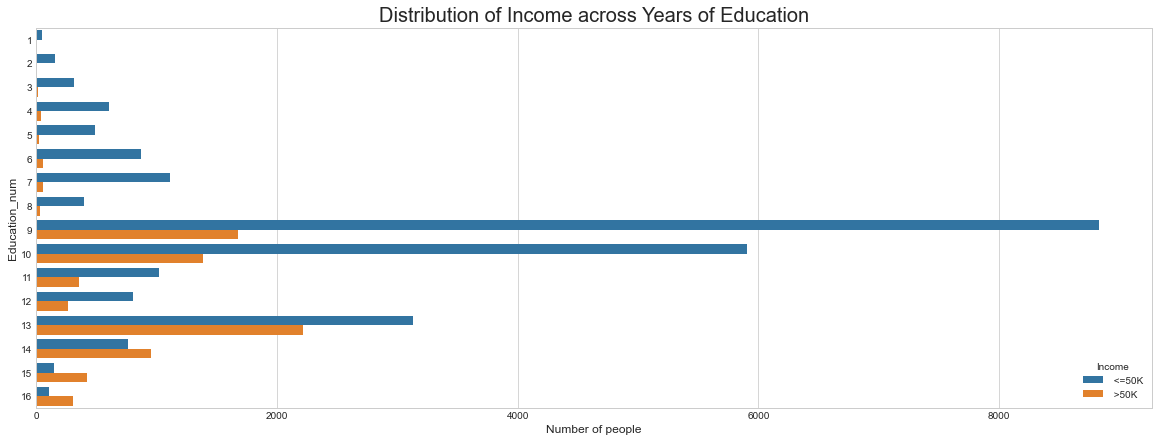

In [202]:
plt.figure(figsize=(20, 7))
sns.countplot( y='Education_num',hue='Income',data=df)
plt.title('Distribution of Income across Years of Education',fontsize=20)
plt.xlabel('Number of people',fontsize=12)
plt.ylabel('Education_num',fontsize=12)
plt.show()

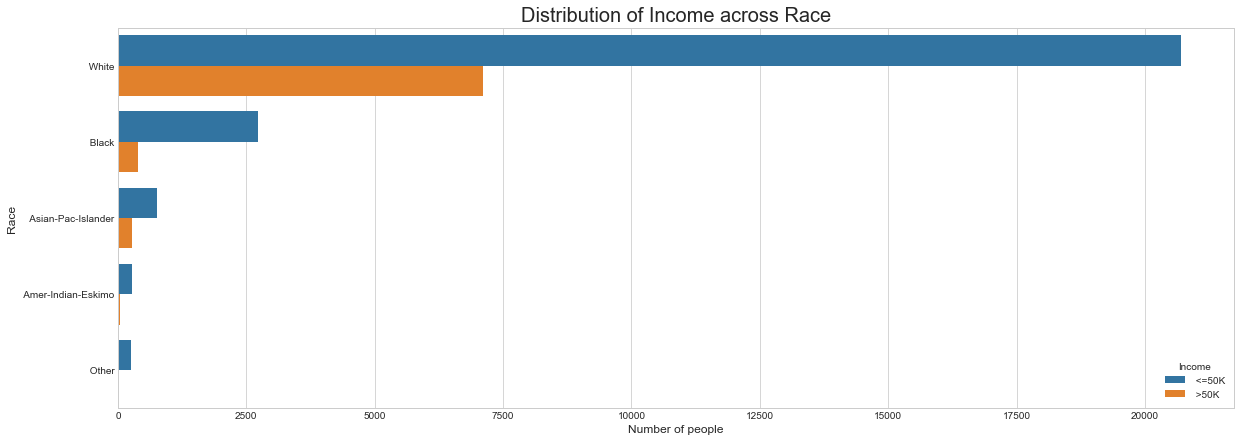

In [203]:
plt.figure(figsize=(20, 7))
sns.countplot( y='Race',hue='Income',data=df)
plt.title('Distribution of Income across Race',fontsize=20)
plt.xlabel('Number of people',fontsize=12)
plt.ylabel('Race',fontsize=12)
plt.show()

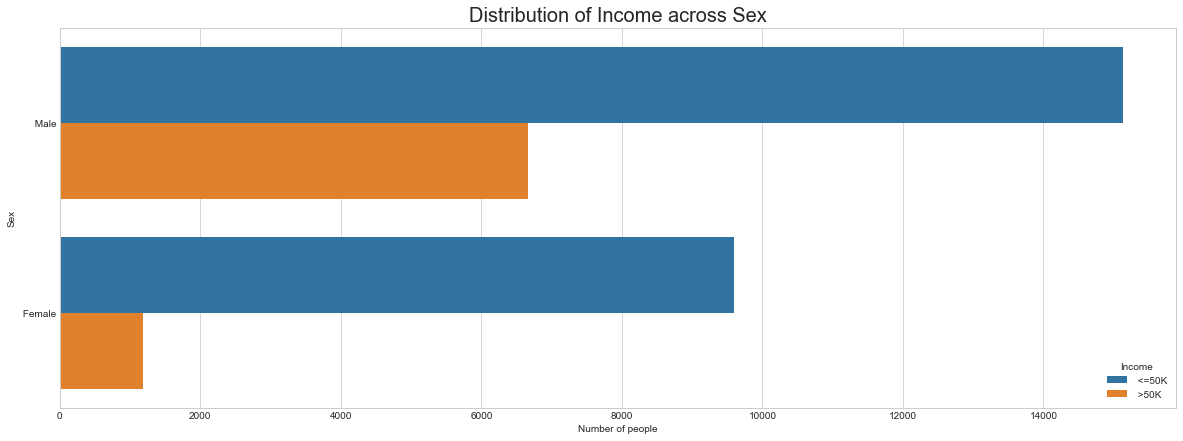

In [204]:
plt.figure(figsize=(20, 7))
sns.countplot( y='Sex',hue='Income',data=df)
plt.title('Distribution of Income across Sex',fontsize=20)
plt.xlabel('Number of people',fontsize=10)
plt.ylabel('Sex',fontsize=10)
plt.show()

In [205]:
#NOW we check for skewness in data

df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [206]:
# as we can observe there is skewness in the data .....so we tranform data into near to normally distributed data i.e. value should be near to zero.

#we are doing this by log1p method to make the skew value near to zero.

In [207]:
skew=('Fnlwgt','Capital_gain','Capital_loss')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [208]:
df.skew()

Age               0.558738
Fnlwgt           -0.842559
Education_num    -0.311630
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
dtype: float64

In [209]:
#now our data is near to normally distributed...and we are good to go ahead

In [210]:
#so now we perform some encoding using various encoding techniques
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

In [211]:
le.inverse_transform([0,1])

array([' <=50K', ' >50K'], dtype=object)

In [212]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,11.330348,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.0,13,39.0,0
1,38,4.0,12.281398,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.0,40,39.0,0
2,53,4.0,12.366157,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.0,40,39.0,0
3,28,4.0,12.732013,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.0,40,5.0,0
4,37,4.0,12.558780,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,12.458010,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.0,38,39.0,0
32556,40,4.0,11.947140,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.0,40,39.0,1
32557,58,4.0,11.931050,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.0,40,39.0,0
32558,22,4.0,12.213500,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.0,20,39.0,0


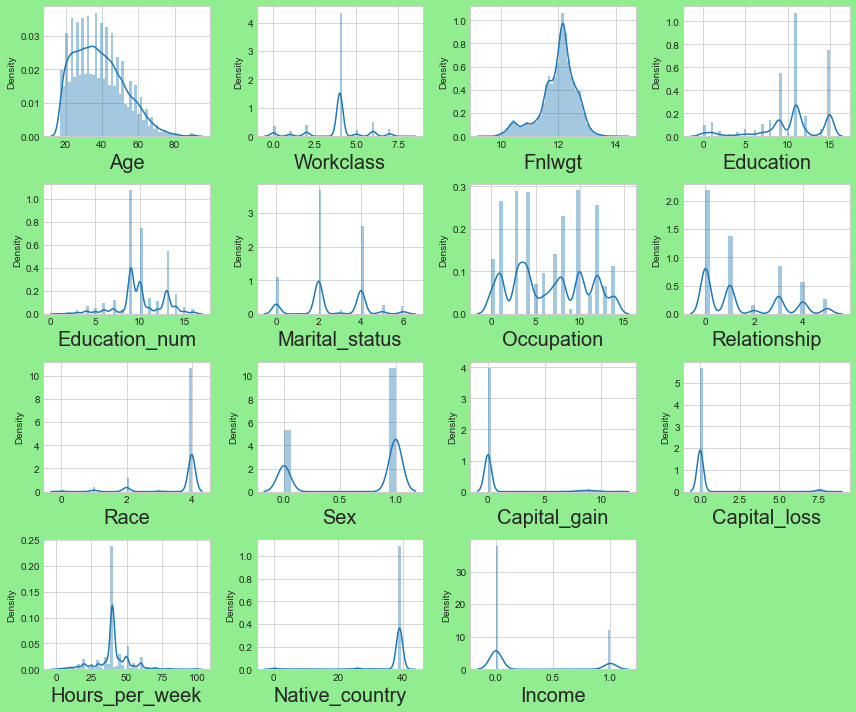

In [213]:
plt.figure(figsize=(12,10),facecolor='lightgreen')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [241]:
y = df['Income']
X = df.drop(columns=['Income'])

In [249]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_scaled.shape[1]

14

In [250]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [251]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [252]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [253]:
RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [254]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

In [255]:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.7545132743362832
At random state0,the testing accuracy is:-0.7700242718446602


At random state1,the training accuracy is:-0.7539317319848293
At random state1,the testing accuracy is:-0.7481796116504854


At random state2,the training accuracy is:-0.7517572692793931
At random state2,the testing accuracy is:-0.7579894822006472


At random state3,the training accuracy is:-0.7531479140328697
At random state3,the testing accuracy is:-0.7505056634304207


At random state4,the training accuracy is:-0.755802781289507
At random state4,the testing accuracy is:-0.7397855987055016


At random state5,the training accuracy is:-0.7557522123893805
At random state5,the testing accuracy is:-0.7576860841423948


At random state6,the training accuracy is:-0.7536030341340075
At random state6,the testing accuracy is:-0.7545509708737864


At random state7,the training accuracy is:-0.7529456384323641
At random state7,the testing accuracy is:-0.7497977346278317


A

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DEEPAK~1.MUK\AppData\Local\Temp/ipykernel_15244/3323946696.py", line 4, in <module>
    reg.fit(X_train,y_train)
  File "E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py", line 1589, in fit
    fold_coefs_ = Parallel(
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_ba

TypeError: object of type 'NoneType' has no len()

In [256]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [257]:
X_train.shape

(26048, 14)

In [258]:
y_train.shape

(26048,)

In [259]:
X_test.shape

(6512, 14)

In [260]:
y_test.shape

(6512,)

In [310]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)
print(classification_report(y_test,y_pred))

accuracy score: 80.37469287469288
cross val score: 80.79545454545455
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4912
           1       0.61      0.57      0.59      1600

    accuracy                           0.80      6512
   macro avg       0.73      0.73      0.73      6512
weighted avg       0.80      0.80      0.80      6512



In [311]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)
print(classification_report(y_test,y_pred))

accuracy score: 80.60503685503686
cross val score: 80.6081081081081
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4912
           1       0.60      0.62      0.61      1600

    accuracy                           0.81      6512
   macro avg       0.74      0.74      0.74      6512
weighted avg       0.81      0.81      0.81      6512



In [312]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',xg_score*100)

xgscore=cross_val_score(xg,X,y,cv=5)
xgr=xgscore.mean()
print('cross val score:',xgr*100)
print(classification_report(y_test,y_pred))

accuracy score: 86.73218673218673
cross val score: 86.93488943488943
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4912
           1       0.76      0.67      0.71      1600

    accuracy                           0.87      6512
   macro avg       0.83      0.80      0.81      6512
weighted avg       0.86      0.87      0.86      6512



In [313]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)
print(classification_report(y_test,y_pred))

accuracy score: 85.58046683046683
cross val score: 85.73402948402948
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4912
           1       0.74      0.63      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [ ]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
modelscore=accuracy_score(y_test,y_pred)
print('accuracy score:',modelscore*100)

modelscore=cross_val_score(model,X,y,cv=5)
modelc=modelscore.mean()
print('cross val score:',modelc*100)
print(classification_report(y_test,y_pred))

accuracy score: 81.6492628992629


In [ ]:
#so we will hypertune parameters for random forest classifier as it has accuracy score 85% ,cross val score of 85% and f1 score od 91%
grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}

In [ ]:
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

In [ ]:
type(clf)

In [ ]:
clf.best_estimators_

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimators_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [ ]:
#CONCLUSION
#In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

#A hyperparameter tuned Random Forest classifier gives the highest accuracy score of 86% and cross val score of 86%.and f1 score of 91%

In [ ]:
#saving the model to local file system
filename='census income_model.pickle'
pickle.dump(xg,open(filename,'wb'))